In [303]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pytz

In [267]:
#read in data
hn = pd.read_csv('hn_data.csv')

In [386]:
#resort by upvotes and reset index
hn_data = hn.sort_values(by = 'stories_score', ascending = False).reset_index(drop=True)

In [389]:
#make stories time column consist of timestamp objects
hn_data['stories_time'] = pd.to_datetime(hn_data['stories_unix'], unit = 's')
#add a day of the week column
hn_data['stories_day'] = hn_data['stories_time'].dt.day_name()
#drop unix column
hn_data = hn_data.drop(columns = 'stories_unix')

In [357]:
hn_data

,stories_score,stories_title,stories_time,stories_day
0,6015,Stephen Hawking has died,2018-03-14 03:50:30,Wednesday
1,5771,A Message to Our Customers,2016-02-17 08:38:37,Wednesday
2,4338,Steve Jobs has passed away.,2011-10-05 23:42:23,Wednesday
3,4107,"Reflecting on one very, very strange year at Uber",2017-02-19 21:16:33,Sunday
4,3531,Show HN: This up votes itself,2012-03-23 00:40:39,Friday
5,3384,F.C.C. Repeals Net Neutrality Rules,2017-12-14 18:13:35,Thursday
6,3238,Cloudflare Reverse Proxies Are Dumping Uniniti...,2017-02-23 23:05:08,Thursday
7,3125,UK votes to leave EU,2016-06-24 03:48:57,Friday
8,3086,Tim Cook Speaks Up,2014-10-30 11:12:23,Thursday
9,3030,Announcing the first SHA-1 collision,2017-02-23 13:01:08,Thursday


In [358]:
#average scores per weekday
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
hn_avg_perday = pd.DataFrame(columns = ['Day', 'Average', 'Max'])
hn_avg_perday['Day'] = days
for i in range(0, 7):
    hn_avg_perday['Average'][i] = hn_data[hn_data["stories_day"] == days[i]].stories_score.mean()
    hn_avg_perday['Max'][i] = hn_data[hn_data["stories_day"] == days[i]].stories_score.max()

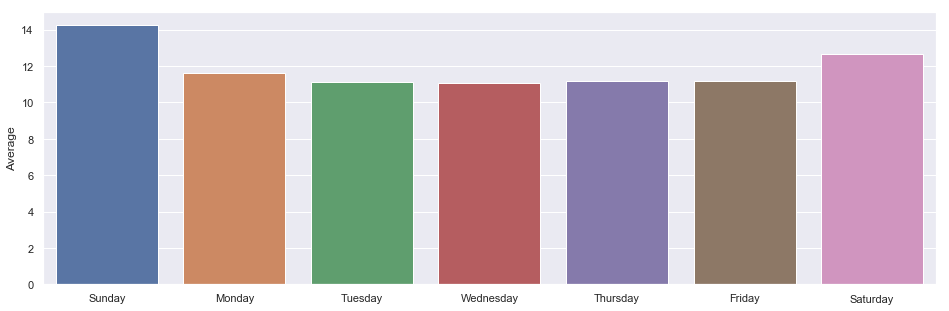

In [359]:
#plot averages
sns.barplot(x = days, y = hn_avg_perday.Average)

In [414]:
#averages per hour per day
hn_avg_hrday = hn_data.groupby([hn_data["stories_day"], hn_data["stories_time"].dt.hour]).mean()
hn_avg_hrday = hn_avg_hrday.reindex(days, level = 0).reset_index()

In [415]:
hn_avg_hrday.nlargest(10, 'stories_score')

,stories_day,stories_time,stories_score
23,Sunday,23,15.548173
25,Monday,1,15.150421
18,Sunday,18,15.047117
12,Sunday,12,15.011485
11,Sunday,11,14.991381
0,Sunday,0,14.926044
21,Sunday,21,14.838941
19,Sunday,19,14.735488
163,Saturday,19,14.714501
15,Sunday,15,14.601099


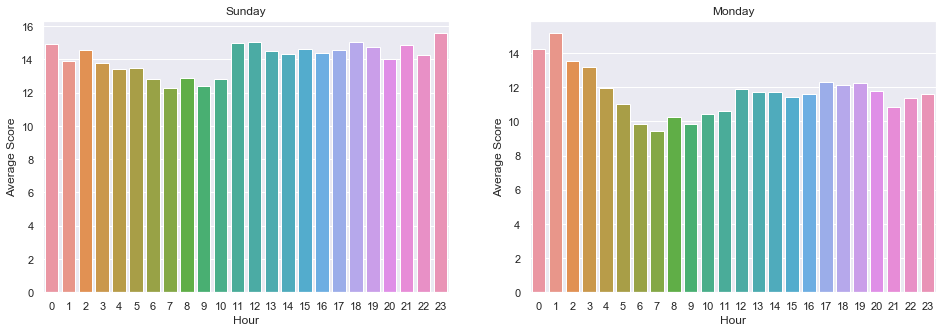

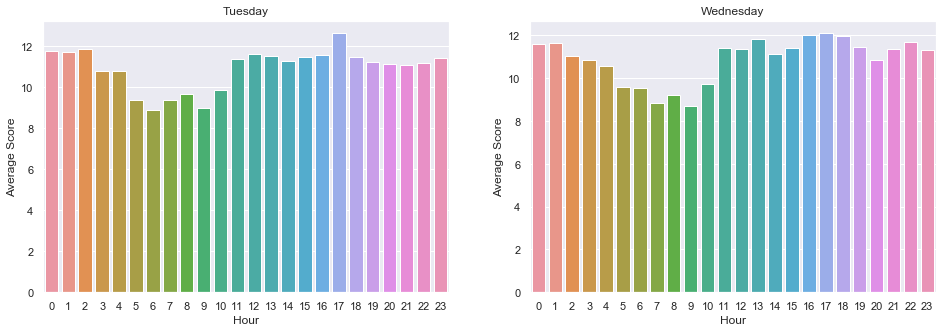

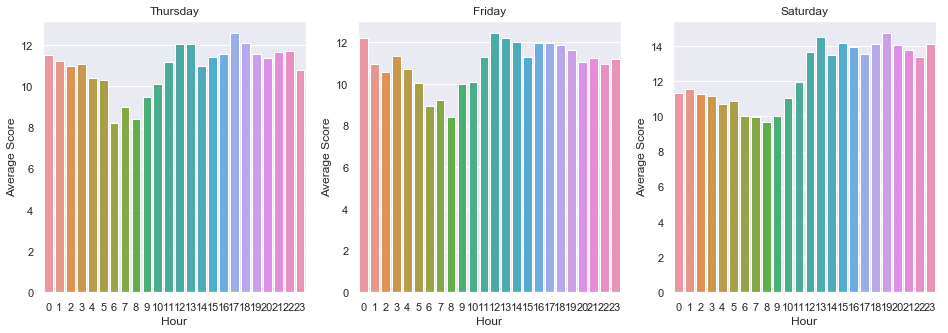

In [425]:
#plot all seven days
plt.rcParams['figure.figsize']=(16,5)
#there isn't a standard way to format seven plots so we will iterate over a dummy list
plotarrange = [[0,1], [2, 3], [4, 5, 6]]
for i in plotarrange:
    fig, axs = plt.subplots(ncols = len(i))
    x = 0
    for j in range(i[0], i[-1]+1):
        plot = sns.barplot(x = hn_avg_hrday.stories_time[hn_avg['stories_day'] == days[j]], 
                           y = hn_avg_hrday.stories_score[hn_avg['stories_day'] == days[j]], ax = axs[x])
        plot.set(xlabel = 'Hour', ylabel = 'Average Score')
        plot.set_title(days[j])
        x+=1

In [426]:
#return best ten results if averaged over time rounded to input nearest input length
def max_avg_per_slice(x):
    avg = hn_data.groupby([hn_data["stories_day"], hn_data["stories_time"].dt.round(x).dt.time]).mean()
    avg = avg.reindex(days, level = 0)
    avg = avg.reset_index()
    return avg.nlargest(10, 'stories_score')

In [427]:
max_avg_per_slice('15min')

,stories_day,stories_time,stories_score
94,Sunday,23:30:00,17.176054
61,Sunday,15:15:00,16.310833
60,Sunday,15:00:00,16.177297
74,Sunday,18:30:00,16.064540
100,Monday,01:00:00,16.018083
0,Sunday,00:00:00,15.926516
13,Sunday,03:15:00,15.851672
73,Sunday,18:15:00,15.819050
652,Saturday,19:00:00,15.739108
3,Sunday,00:45:00,15.676190


In [366]:
#fill empty titles with empty string
hn_data['stories_title'] = hn_data['stories_title'].fillna("")
#group by title lengths and average scores
title_grouped = hn_data.groupby(hn_data['stories_title'].map(lambda x: len(x.split()))).mean()

In [390]:
title_grouped

,stories_score
stories_title,
0,2.750000
1,8.147800
2,13.300602
3,13.293389
4,13.317486
5,12.523615
6,11.426665
7,11.222462
8,10.741851


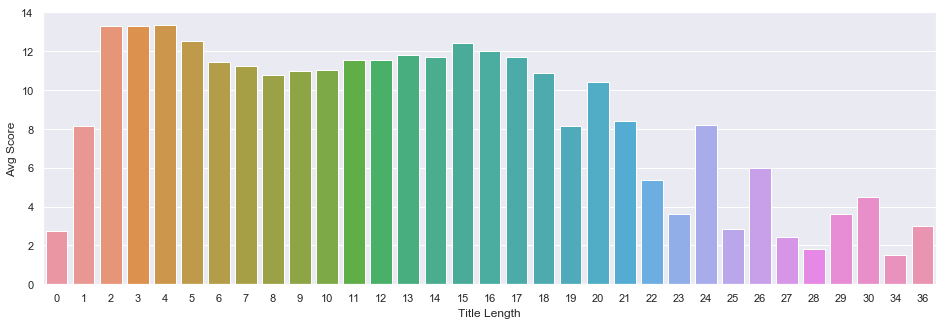

In [391]:
#plot average scores for each title length
sns.barplot(x = title_grouped.index, y = 'stories_score', data = title_grouped)
plt.xlabel('Title Length')
plt.ylabel('Avg Score')
plt.show()